In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Abra o ficheiro com a imagem "lenac.tif"e apresente a imagem. Verifique para que servem os métodos "dtype"e "shape":

In [9]:
x_img = cv2.imread("lenac.tif")
cv2.imshow("Original Image", x_img)
print(x_img.dtype)
print(x_img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

uint8
(512, 512, 3)


2. Grave a mesma imagem, mas agora em formato "JPEG"com diferentes qualidades. Verifique visualmente a qualidade das imagens assim como o tamanho do ficheiro. Produza o código para calcular a taxa de compressão, a SNR e a PSNR.

In [10]:
cv2.imwrite("file1.jpg", x_img, (cv2.IMWRITE_JPEG_QUALITY, 80))
cv2.imwrite("file2.jpg", x_img, (cv2.IMWRITE_JPEG_QUALITY, 10))

True

3. Converta a imagem que está na variável x_img para níveis de cinzento, usando o método "cvtColor"e grave o resultado. Este método aplica a transformação Y = R  299=1000 + G  587=1000 + B  114=1000, justifique a utilização desta equação. Verifique também o tamanho do ficheiro e compare-o com o ficheiro original.

In [11]:
x_img_g = cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", x_img_g)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("file3.bmp", x_img_g)

True

4. Apresente o histograma da imagem (em tons de cinzento) que está na variável x_img_g. Verifique quantos níveis de cinzento tem a imagem.

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 6.000e+00, 2.000e+01, 2.900e+01, 5.900e+01,
        9.700e+01, 1.370e+02, 1.810e+02, 2.200e+02, 3.010e+02, 4.210e+02,
        5.000e+02, 6.120e+02, 7.600e+02, 9.400e+02, 1.062e+03, 1.254e+03,
        1.443e+03, 1.646e+03, 1.761e+03, 1.882e+03, 1.998e+03, 2.092e+03,
        2.020e+03, 2.105e+03, 2.086e+03, 2.029e+03, 1.979e+03, 1.808e+03,
        1.731e+03, 1.668e+03, 1.578e+03, 1.469e+03, 1.278e+03, 1.236e+03,
        1.220e+03, 1.003e+03, 9.300e+02, 9.760e+02, 8.800e+02, 8.900e+02,
        7.910e+02, 7.970e+02, 7.710e+02, 7.800e+02, 8.520e+02, 8.190e+02,
        8.320e+02, 7.850e+02, 8.790e+02, 9.090e+02, 8.680e+02, 8.540e+02,
        9.470e+02, 9.730e+02, 9.050e+0

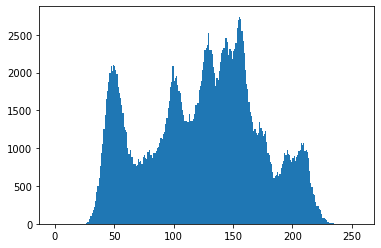

In [12]:
plt.hist(x_img_g.ravel(),256, [0, 256])

5. Nos próximos trabalhos será necessário realizar operações com os valores de cada pixel. Para este efeito pode-se transformar a imagem para um array. O código seguinte representa o pixel mais significante da imagem. Apresente oito imagens, cada uma com o valor de cada bit para todos os pixeis.

In [13]:
for x in range(0,200,25):
    cv2.imshow(f"BW-{x}", (x_img_g > x) * 1.0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


6. Construa uma função que realize o algoritmo de dithering Floyd Steinberg. Esta função recebe uma matrix (com os pixeis em tons de cinzento) e devolve uma matrix com valores a preto e branco. Este algoritmo aproxima cada pixel da imagem (x) ao valor mais próximo (preto ou branco) e o erro é difundido para os pixeis adjacentes seguindo o método:

<method>

Aplique esta função à imagem em tons de cinzento que está na variável x_img_g.

In [28]:
"""
Shape of image is accessed by img.shape. It returns a tuple of number of rows, columns and channels (if image is color):
>>> print img.shape
(342, 548, 3)
"""

def Dither(img):

    output = np.copy(img)

    for y in range(1,img.shape[0]-1):
        for x in range(1,img.shape[1]-1):
        
            pix = output[y][x]
            newpix = round(pix/255) * 255

            error = pix - newpix

            output[y][x] = newpix

            output[y    ][x + 1] += error * 7/16
            output[y + 1][x - 1] += error * 3/16
            output[y + 1][x    ] += error * 5/16
            output[y + 1][x + 1] += error * 1/16

    return(output)


y = dither(x_img_g)
cv2.imshow("Dither", y)
cv2.waitKey(0)
cv2.destroyAllWindows()

7. Construa uma função para gravar a matriz obtida na questão anterior (variável y)para um ficheiro binário. Verifique o tamanho do ficheiro inicial e do ficheiro final. Calcule a taxa de compressão e meça o SNR e o PSNR.

8. Crie uma função que apresente uma imagem com dimensão de 100 x 100 pixeis como se apresenta na figura. O ângulo de cada sector é dado por parâmetro passado à função (o ângulo é um valor inteiro entre 0 e 360 graus).